In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense

C:\Users\HP\Anaconda3_5\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
data = pd.read_csv('ship_data.csv')

In [3]:
print(data.columns.values)

['Passenger ID' 'Class' 'Name' 'Gender' 'Age' 'Siblings Count'
 'Parents Count' 'Fare' 'Embarked' 'Survived']


In [4]:
data.describe()

,Passenger ID,Class,Age,Siblings Count,Parents Count,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,30.014244,0.523008,0.381594,32204.207969,0.383838
std,257.353842,0.836071,16.633418,1.102743,0.806057,49693.428597,0.486592
min,1.000000,1.000000,-20.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.000000,0.000000,0.000000,7910.400000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14454.200000,0.000000
75%,668.500000,3.000000,38.750000,1.000000,0.000000,31000.000000,1.000000
max,891.000000,3.000000,200.000000,8.000000,6.000000,512329.200000,1.000000


In [5]:
data.describe(include=['O'])

,Name,Gender,Embarked
count,891,891,889
unique,891,2,3
top,Una Kelly,male,New York
freq,1,577,644


In [6]:
data[["Gender", "Survived"]].groupby(["Gender"], as_index=False).mean().sort_values(by='Survived', ascending=False)
#survival mean for female is ~ 74% 

,Gender,Survived
0,female,0.742038
1,male,0.188908


In [7]:
data[data['Fare']>55000].describe() #survivel mean is ~70% for passengers with highe fare.

,Passenger ID,Class,Age,Siblings Count,Parents Count,Fare,Survived
count,139.000000,139.000000,121.000000,139.000000,139.000000,139.000000,139.000000
mean,450.014388,1.251799,35.610909,0.985612,0.611511,116731.293525,0.690647
std,241.693691,0.626626,17.899788,1.756914,0.855594,81546.528960,0.463898
min,2.000000,1.000000,0.920000,0.000000,0.000000,55441.700000,0.000000
25%,269.500000,1.000000,24.000000,0.000000,0.000000,71000.000000,0.000000
50%,436.000000,1.000000,35.000000,1.000000,0.000000,83158.300000,1.000000
75%,660.500000,1.000000,46.000000,1.000000,1.000000,134500.000000,1.000000
max,880.000000,3.000000,150.000000,8.000000,4.000000,512329.200000,1.000000


In [8]:
data[data['Age']<7].describe() #survivel mean is ~70% for kids < 7.

,Passenger ID,Class,Age,Siblings Count,Parents Count,Fare,Survived
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,416.387755,2.530612,2.105510,1.632653,1.306122,31215.389796,0.714286
std,290.109521,0.648782,3.765936,1.523344,0.584668,28000.727048,0.456435
min,8.000000,1.000000,-20.000000,0.000000,0.000000,8516.700000,0.000000
25%,173.000000,2.000000,1.000000,0.000000,1.000000,18750.000000,0.000000
50%,382.000000,3.000000,2.000000,1.000000,1.000000,26000.000000,1.000000
75%,721.000000,3.000000,4.000000,3.000000,2.000000,31387.500000,1.000000
max,870.000000,3.000000,6.000000,5.000000,2.000000,151550.000000,1.000000


In [9]:
data[["Class", "Survived"]].groupby(["Class"], as_index=False).mean().sort_values(by='Survived', ascending=False)
#1st class passengers is more likely to survive. 

,Class,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
data.info()
#null values in age and embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Passenger ID      891 non-null int64
Class             891 non-null int64
Name              891 non-null object
Gender            891 non-null object
Age               714 non-null float64
Siblings Count    891 non-null int64
Parents Count     891 non-null int64
Fare              891 non-null float64
Embarked          889 non-null object
Survived          891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


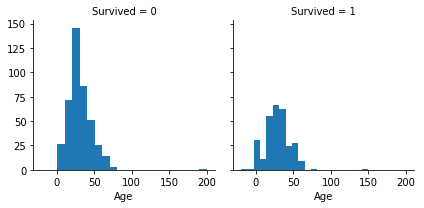

In [11]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

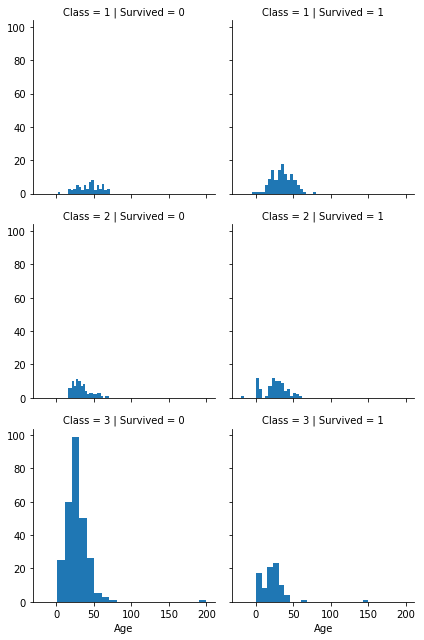

In [12]:
g = sns.FacetGrid(data, col='Survived',row = 'Class')
g.map(plt.hist, 'Age', bins=20)

In [13]:
lbl = LabelEncoder()
lbl.fit(data['Gender'])
data['Gender'] = lbl.transform(data['Gender']) #encoding Gender

In [14]:
data.loc[data.Age > 120,'Age'] = np.nan
data.loc[data.Age < 0,'Age'] = np.nan #removing outliers

In [15]:
#filling up nans
guess_ages = np.zeros((2,3))

In [16]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = data[(data['Gender'] == i) & (data['Class'] == j+1)]['Age'].dropna()
        age_guess = guess_df.median()
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5


In [17]:
for i in range(0, 2):
    for j in range(0, 3):
        data.loc[ (data.Age.isnull()) & (data.Gender == i) & (data.Class == j+1), 'Age'] = guess_ages[i,j]            

In [18]:
#Ages to band.
data['Age'] = data['Age'].astype(int)
data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4

In [19]:
data[["Age", "Survived"]].groupby(["Age"], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0,0.545455
3,3,0.434783
2,2,0.414747
1,1,0.337374
4,4,0.090909


In [20]:
#new variable alone.
data['FamilySize'] = data['Siblings Count'] + data['Parents Count']
data['Alone'] = 0
data.loc[data['FamilySize'] == 1, 'Alone'] = 1

In [21]:
data[["Alone", "Survived"]].groupby(["Alone"], as_index=False).mean().sort_values(by='Survived', ascending=False)
#alone passengers have less chance of survival

,Alone,Survived
1,1,0.552795
0,0,0.346575


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Passenger ID      891 non-null int64
Class             891 non-null int64
Name              891 non-null object
Gender            891 non-null int64
Age               891 non-null int32
Siblings Count    891 non-null int64
Parents Count     891 non-null int64
Fare              891 non-null float64
Embarked          889 non-null object
Survived          891 non-null int64
FamilySize        891 non-null int64
Alone             891 non-null int64
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 80.1+ KB


In [23]:
#missing values in Embarked.
port = data.Embarked.dropna().mode()[0]
data['Embarked'] = data['Embarked'].fillna(port)
data['Embarked'] = data['Embarked'].map( {'New York': 0, 'Los Angeles': 1, 'Chicago': 2} ).astype(int)

In [24]:
data=data.drop(['Passenger ID','Name','FamilySize'] ,1)

In [25]:
#target variable.
y = data.iloc[:,-2]

In [26]:
data=data.drop(['Survived'] ,1)

In [27]:
#Indep. variable.
X = data.iloc[:,:]
X

,Class,Gender,Age,Siblings Count,Parents Count,Fare,Embarked,Alone
0,3,1,1,1,0,7250.0,0,1
1,1,0,2,1,0,71283.3,1,1
2,3,0,1,0,0,7925.0,0,0
3,1,0,2,1,0,53100.0,0,1
4,3,1,2,0,0,8050.0,0,0
5,3,1,1,0,0,8458.3,2,0
6,1,1,3,0,0,51862.5,0,0
7,3,1,0,3,1,21075.0,0,0
8,3,0,1,0,2,11133.3,0,0
9,2,0,1,1,0,30070.8,1,1


In [28]:
onehotencoder = OneHotEncoder(categorical_features = [2])
X = onehotencoder.fit_transform(X).toarray()
X = np.delete(X, 0, axis=1)

In [29]:
onehotencoder = OneHotEncoder(categorical_features = [4])
X = onehotencoder.fit_transform(X).toarray()
X = np.delete(X, 0, axis=1)

onehotencoder = OneHotEncoder(categorical_features = [8])
X = onehotencoder.fit_transform(X).toarray()
X = np.delete(X, 0, axis=1)
X[0]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   7.25000000e+03,
         0.00000000e+00,   1.00000000e+00])

In [30]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X[0]

array([-0.39070706, -0.31407587, -0.07512217, -0.06715343, -0.07512217,
       -0.03352008, -0.51015154,  0.90258736,  0.89442719, -0.56741383,
       -0.28972678, -0.1118034 ,  0.73769513,  0.43279337, -0.50244517,
       -0.56883712,  2.12935706])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
classifier = Sequential()
classifier.add(Dense(output_dim = 32 ,kernel_initializer='uniform', activation = 'relu', input_dim = 17))
classifier.add(Dense(output_dim = 32, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 32, kernel_initializer='uniform', activation = 'relu'))
classifier.add(Dense(output_dim = 1, kernel_initializer='uniform',activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 70)

C:\Users\HP\Anaconda3_5\envs\py35\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, kernel_initializer="uniform", input_dim=17, activation="relu")`
  
C:\Users\HP\Anaconda3_5\envs\py35\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, kernel_initializer="uniform", activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3_5\envs\py35\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=32, kernel_initializer="uniform", activation="relu")`
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3_5\envs\py35\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="uniform", activation="sigmoid")`
  """
C:\Users\HP\Anaconda3_5\envs\py35\lib\site-pa

Epoch 1/70
712/712 [==============================] - 1s 1ms/step - loss: 0.6743 - acc: 0.6124
Epoch 2/70
712/712 [==============================] - 0s 266us/step - loss: 0.5355 - acc: 0.7683
Epoch 3/70
712/712 [==============================] - 0s 278us/step - loss: 0.4627 - acc: 0.7963
Epoch 4/70
712/712 [==============================] - 0s 298us/step - loss: 0.4410 - acc: 0.8174
Epoch 5/70
712/712 [==============================] - 0s 259us/step - loss: 0.4290 - acc: 0.8272
Epoch 6/70
712/712 [==============================] - 0s 225us/step - loss: 0.4271 - acc: 0.8272
Epoch 7/70
712/712 [==============================] - 0s 232us/step - loss: 0.4200 - acc: 0.8287
Epoch 8/70
712/712 [==============================] - 0s 309us/step - loss: 0.4170 - acc: 0.8287
Epoch 9/70
712/712 [==============================] - 0s 268us/step - loss: 0.4153 - acc: 0.8301
Epoch 10/70
712/712 [==============================] - 0s 322us/step - loss: 0.4119 - acc: 0.8258
Epoch 11/70
712/712 [==========

In [33]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[101,   9],
       [ 27,  42]], dtype=int64)